# EDA for Fast Food Restro Dataset

# Importing Libs

In [4]:
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
df=pd.read_csv("fastfood.csv")

In [6]:
df.head()

,Item,Date,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit
0,Soft Drink,01-Jan-11,17,110,1870,120,1990,2587,129.35,2457.65,417.8005,2875.4505,467.65
1,Hot Wings,01-Jan-11,3,390,1170,120,1290,1677,83.85,1593.15,270.8355,1863.9855,303.15
2,Pizza Twister,01-Jan-11,8,350,2800,100,2900,3770,0.00,3770.00,640.9000,4410.9000,870.00
3,Hot Wings,01-Jan-11,2,390,780,120,900,1170,0.00,1170.00,198.9000,1368.9000,270.00
4,Xtreme Box,01-Jan-11,4,1050,4200,100,4300,5590,0.00,5590.00,950.3000,6540.3000,1290.00


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75630 entries, 0 to 75629
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item                 75630 non-null  object 
 1   Date                 75630 non-null  object 
 2   Quantity             75630 non-null  int64  
 3   Unit_Cost            75630 non-null  int64  
 4   Basic_Cost           75630 non-null  int64  
 5   Delivery_Cost        75630 non-null  int64  
 6   Net_Cost             75630 non-null  int64  
 7   Basic_Selling_Price  75630 non-null  int64  
 8   Discount             75630 non-null  float64
 9   Selling_Price        75630 non-null  float64
 10  Tax                  75630 non-null  float64
 11  Cash _Received       75630 non-null  float64
 12  Profit               75630 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.5+ MB


In [9]:
df.shape    #shows no missing values

(75630, 13)

In [10]:
df.columns

Index(['Item', 'Date', 'Quantity', 'Unit_Cost', 'Basic_Cost ', 'Delivery_Cost',
       'Net_Cost ', 'Basic_Selling_Price', 'Discount', 'Selling_Price', 'Tax',
       'Cash _Received', 'Profit'],
      dtype='object')

In [11]:
df.isnull().sum()    #proves no missing values

Item                   0
Date                   0
Quantity               0
Unit_Cost              0
Basic_Cost             0
Delivery_Cost          0
Net_Cost               0
Basic_Selling_Price    0
Discount               0
Selling_Price          0
Tax                    0
Cash _Received         0
Profit                 0
dtype: int64

In [12]:
df.describe()

,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit
count,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000,75630.000000
mean,10.629684,437.915245,4631.449160,108.158403,4739.607563,6161.489832,166.867728,5994.622104,1019.085758,7013.707861,1255.014541
std,5.559944,316.986423,4578.533457,9.829028,4578.239994,5951.711992,281.994141,5767.503362,980.475572,6747.978934,1203.916507
min,1.000000,0.000000,0.000000,100.000000,100.000000,130.000000,0.000000,123.500000,20.995000,144.495000,23.500000
25%,6.000000,250.000000,1650.000000,100.000000,1750.000000,2275.000000,0.000000,2262.000000,384.540000,2646.540000,462.000000
50%,11.000000,350.000000,3520.000000,100.000000,3640.000000,4732.000000,31.850000,4680.000000,795.600000,5475.600000,982.300000
75%,15.000000,510.000000,5850.000000,120.000000,5950.000000,7735.000000,256.100000,7582.900000,1289.093000,8871.993000,1586.250000
max,45.000000,1600.000000,40500.000000,120.000000,40600.000000,52780.000000,2639.000000,50141.000000,8523.970000,58664.970000,9636.000000


# Statistical Analysis

In [13]:
df.describe(include=['object'])

,Item,Date
count,75630,75630
unique,19,1096
top,Mid Night Deal,20-Feb-12
freq,8325,135


In [19]:
unique_items=pd.DataFrame(df['Item'].unique())
unique_items

,0
0,Soft Drink
1,Hot Wings
2,Pizza Twister
3,Xtreme Box
4,Mid Night Deal
5,Bucket of Fries
6,Nuggests
7,Chicky Meal
8,Boneless Box
9,Value Box


In [20]:
#stripping white spaces so that there no duplicacy due to white spaces


df['Item']=df['Item'].str.strip()
unique_items=pd.DataFrame(df['Item'].unique())
unique_items

,0
0,Soft Drink
1,Hot Wings
2,Pizza Twister
3,Xtreme Box
4,Mid Night Deal
5,Bucket of Fries
6,Nuggests
7,Chicky Meal
8,Boneless Box
9,Value Box


# Correlation between Features

In [21]:
df.corr()

,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit
Quantity,1.000000,-0.013897,0.526477,-0.038980,0.526427,0.526427,0.318810,0.527652,0.527652,0.527652,0.525892
Unit_Cost,-0.013897,1.000000,0.744132,-0.016496,0.744144,0.744144,0.506401,0.743151,0.743151,0.743151,0.730332
Basic_Cost,0.526477,0.744132,1.000000,-0.030929,0.999998,0.999998,0.667027,0.999323,0.999323,0.999323,0.984596
Delivery_Cost,-0.038980,-0.016496,-0.030929,1.000000,-0.028784,-0.028784,-0.117828,-0.023943,-0.023943,-0.023943,-0.005239
Net_Cost,0.526427,0.744144,0.999998,-0.028784,1.000000,1.000000,0.666817,0.999336,0.999336,0.999336,0.984648
Basic_Selling_Price,0.526427,0.744144,0.999998,-0.028784,1.000000,1.000000,0.666817,0.999336,0.999336,0.999336,0.984648
Discount,0.318810,0.506401,0.667027,-0.117828,0.666817,0.666817,1.000000,0.639221,0.639221,0.639221,0.526498
Selling_Price,0.527652,0.743151,0.999323,-0.023943,0.999336,0.999336,0.639221,1.000000,1.000000,1.000000,0.990354
Tax,0.527652,0.743151,0.999323,-0.023943,0.999336,0.999336,0.639221,1.000000,1.000000,1.000000,0.990354
Cash _Received,0.527652,0.743151,0.999323,-0.023943,0.999336,0.999336,0.639221,1.000000,1.000000,1.000000,0.990354


<AxesSubplot:>

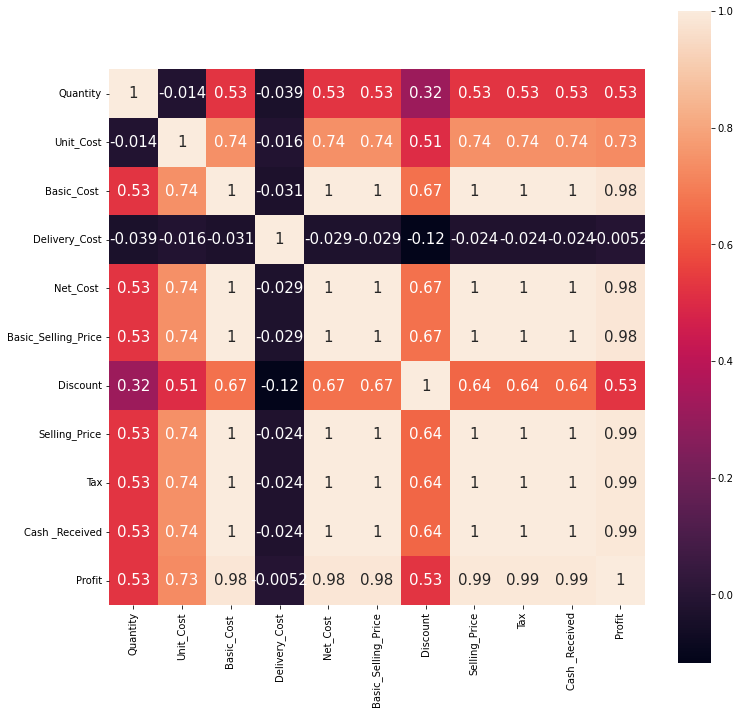

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, annot_kws={'size':15})

# Data Profiling

In [37]:
profile=df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file='profile.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df.head()

,Item,Date,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit,Year
0,Soft Drink,01-Jan-11,17,110,1870,120,1990,2587,129.35,2457.65,417.8005,2875.4505,467.65,2011
1,Hot Wings,01-Jan-11,3,390,1170,120,1290,1677,83.85,1593.15,270.8355,1863.9855,303.15,2011
2,Pizza Twister,01-Jan-11,8,350,2800,100,2900,3770,0.00,3770.00,640.9000,4410.9000,870.00,2011
3,Hot Wings,01-Jan-11,2,390,780,120,900,1170,0.00,1170.00,198.9000,1368.9000,270.00,2011
4,Xtreme Box,01-Jan-11,4,1050,4200,100,4300,5590,0.00,5590.00,950.3000,6540.3000,1290.00,2011


In [39]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df.head()

,Item,Date,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit,Year,Month
0,Soft Drink,01-Jan-11,17,110,1870,120,1990,2587,129.35,2457.65,417.8005,2875.4505,467.65,2011,1
1,Hot Wings,01-Jan-11,3,390,1170,120,1290,1677,83.85,1593.15,270.8355,1863.9855,303.15,2011,1
2,Pizza Twister,01-Jan-11,8,350,2800,100,2900,3770,0.00,3770.00,640.9000,4410.9000,870.00,2011,1
3,Hot Wings,01-Jan-11,2,390,780,120,900,1170,0.00,1170.00,198.9000,1368.9000,270.00,2011,1
4,Xtreme Box,01-Jan-11,4,1050,4200,100,4300,5590,0.00,5590.00,950.3000,6540.3000,1290.00,2011,1


In [42]:
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Item,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit,Year,Month
0,Soft Drink,17,110,1870,120,1990,2587,129.35,2457.65,417.8005,2875.4505,467.65,2011,1
1,Hot Wings,3,390,1170,120,1290,1677,83.85,1593.15,270.8355,1863.9855,303.15,2011,1
2,Pizza Twister,8,350,2800,100,2900,3770,0.00,3770.00,640.9000,4410.9000,870.00,2011,1
3,Hot Wings,2,390,780,120,900,1170,0.00,1170.00,198.9000,1368.9000,270.00,2011,1
4,Xtreme Box,4,1050,4200,100,4300,5590,0.00,5590.00,950.3000,6540.3000,1290.00,2011,1


In [43]:
df['Year'].unique()

array([2011, 2012, 2013], dtype=int64)

In [44]:
df['Tax']=df['Tax'].apply(lambda x: round(x,2))

In [45]:
df['Cash _Received']=df['Cash _Received'].apply(lambda x: round(x,2))

In [46]:
df.head()

,Item,Quantity,Unit_Cost,Basic_Cost,Delivery_Cost,Net_Cost,Basic_Selling_Price,Discount,Selling_Price,Tax,Cash _Received,Profit,Year,Month
0,Soft Drink,17,110,1870,120,1990,2587,129.35,2457.65,417.80,2875.45,467.65,2011,1
1,Hot Wings,3,390,1170,120,1290,1677,83.85,1593.15,270.84,1863.99,303.15,2011,1
2,Pizza Twister,8,350,2800,100,2900,3770,0.00,3770.00,640.90,4410.90,870.00,2011,1
3,Hot Wings,2,390,780,120,900,1170,0.00,1170.00,198.90,1368.90,270.00,2011,1
4,Xtreme Box,4,1050,4200,100,4300,5590,0.00,5590.00,950.30,6540.30,1290.00,2011,1


In [49]:
item_des=df.groupby('Item').size()
item_des

Item
Arabian Rice          3776
Boneless Box          1519
Bucket of Fries       6815
Chicky Meal           5280
Duo Box               3017
Family Festival       2257
Hot Wings             5311
Mid Night Deal        8325
Mineral Water         3017
Nuggests              4537
Pizza Twister         3043
Soft Drink            3030
Super Spicy Burger    2264
Value Box             1512
Value Burger          1511
Xtreme Box            5290
Zinger Burger         3023
Zinger Combo          8325
chicken Piece         3778
dtype: int64

Text(0.5, 1.0, 'Item Count')

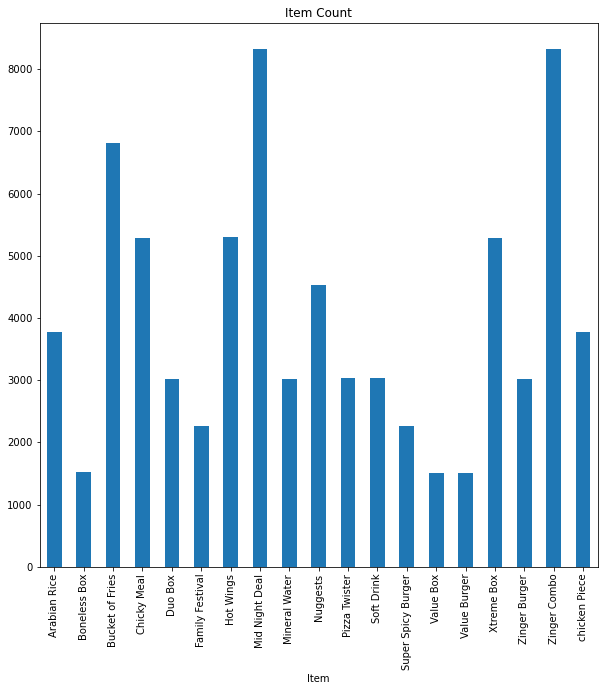

In [68]:
plt.figure(figsize=(10,10))
item_des.plot(kind="bar")
plt.xticks(rotation=90)
plt.title('Item Count')


In [60]:
year_item_des=df.groupby(['Year'])['Item'].count()
year_item_des

Year
2011    25669
2012    23980
2013    25981
Name: Item, dtype: int64

<AxesSubplot:xlabel='Year'>

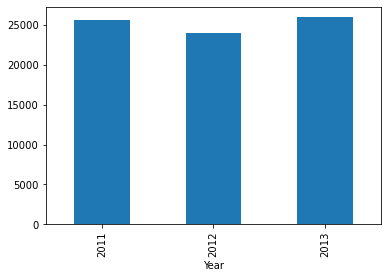

In [67]:
year_item_des.plot(kind="bar")

In [76]:
top5=item_des.nlargest(5)
print(top5)
others=item_des[6:19]

Item
Mid Night Deal     8325
Zinger Combo       8325
Bucket of Fries    6815
Hot Wings          5311
Xtreme Box         5290
dtype: int64


Text(0.5, 1.0, 'Prominent Items')

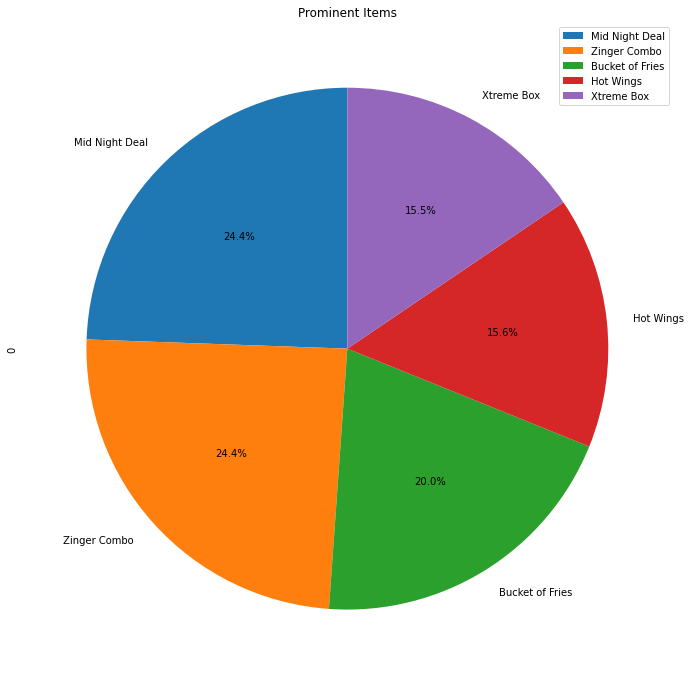

In [113]:
pie=pd.DataFrame(top5)

pie.plot(kind='pie', subplots=True, figsize=(12,12), startangle=90, autopct='%1.1f%%')
plt.title("Prominent Items")

Item
Arabian Rice          1285
Boneless Box           519
Bucket of Fries       2316
Chicky Meal           1785
Duo Box               1021
Family Festival        759
Hot Wings             1808
Mid Night Deal        2824
Mineral Water         1024
Nuggests              1534
Pizza Twister         1037
Soft Drink            1027
Super Spicy Burger     768
Value Box              510
Value Burger           515
Xtreme Box            1786
Zinger Burger         1027
Zinger Combo          2839
chicken Piece         1285
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Sale2011'}, xlabel='Item'>

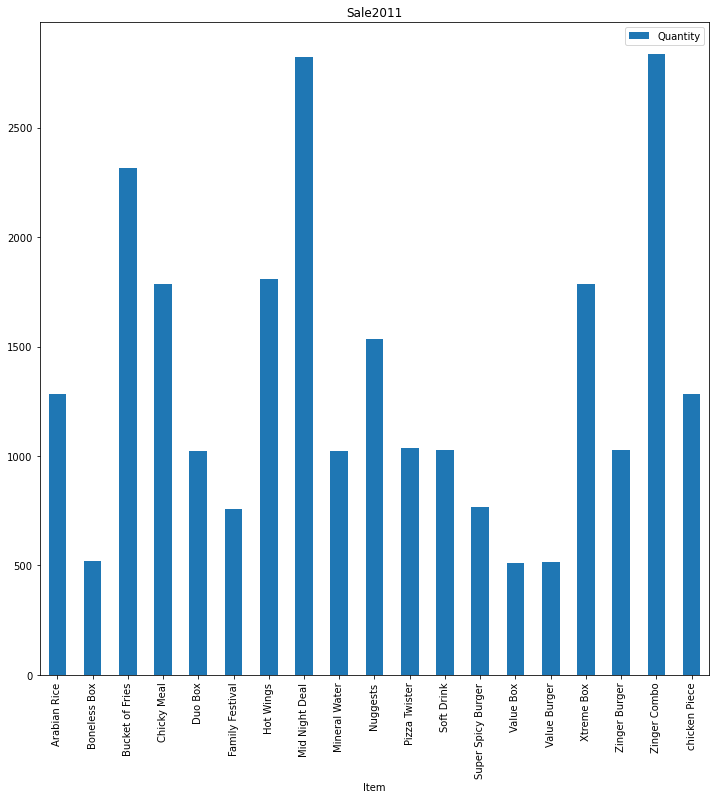

In [148]:
sale_2011=df[df["Year"]==2011].groupby(['Item'])['Quantity'].count()
print(sale_2011)

pd.DataFrame(sale_2011).plot(kind="bar", title="Sale2011", figsize=(12,12))

Item
Arabian Rice          1200
Boneless Box           480
Bucket of Fries       2159
Chicky Meal           1677
Duo Box                958
Family Festival        719
Hot Wings             1679
Mid Night Deal        2635
Mineral Water          958
Nuggests              1440
Pizza Twister          962
Soft Drink             961
Super Spicy Burger     719
Value Box              480
Value Burger           480
Xtreme Box            1679
Zinger Burger          959
Zinger Combo          2636
chicken Piece         1199
Name: Quantity, dtype: int64


<AxesSubplot:title={'center':'Sale2012'}, xlabel='Item'>

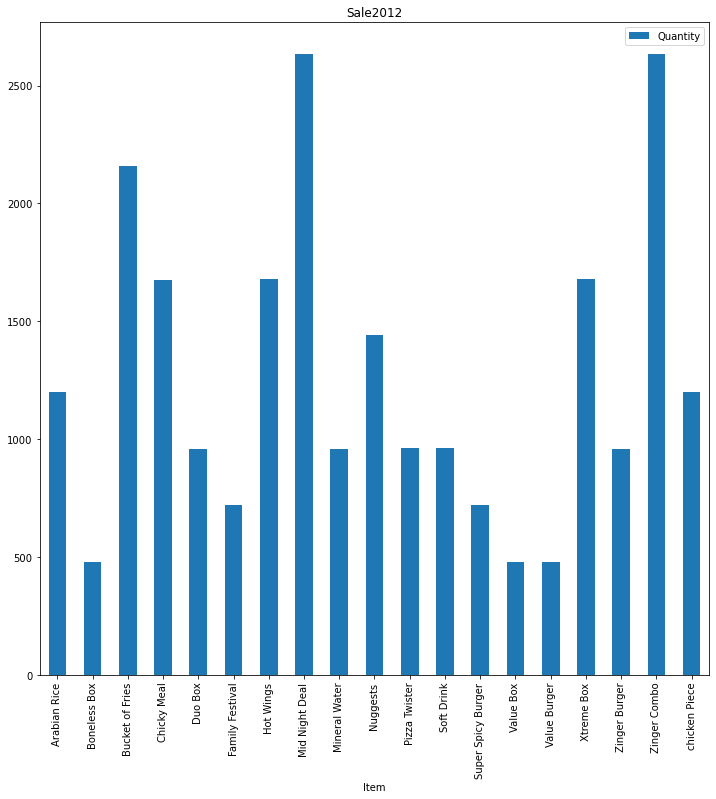

In [146]:
sale_2012=df[df["Year"]==2012].groupby(['Item'])['Quantity'].count()
print(sale_2012)

pd.DataFrame(sale_2012).plot(kind="bar", title="Sale2012", figsize=(12,12))

Item
Arabian Rice          1291
Boneless Box           520
Bucket of Fries       2340
Chicky Meal           1818
Duo Box               1038
Family Festival        779
Hot Wings             1824
Mid Night Deal        2866
Mineral Water         1035
Nuggests              1563
Pizza Twister         1044
Soft Drink            1042
Super Spicy Burger     777
Value Box              522
Value Burger           516
Xtreme Box            1825
Zinger Burger         1037
Zinger Combo          2850
chicken Piece         1294
Name: Quantity, dtype: int64


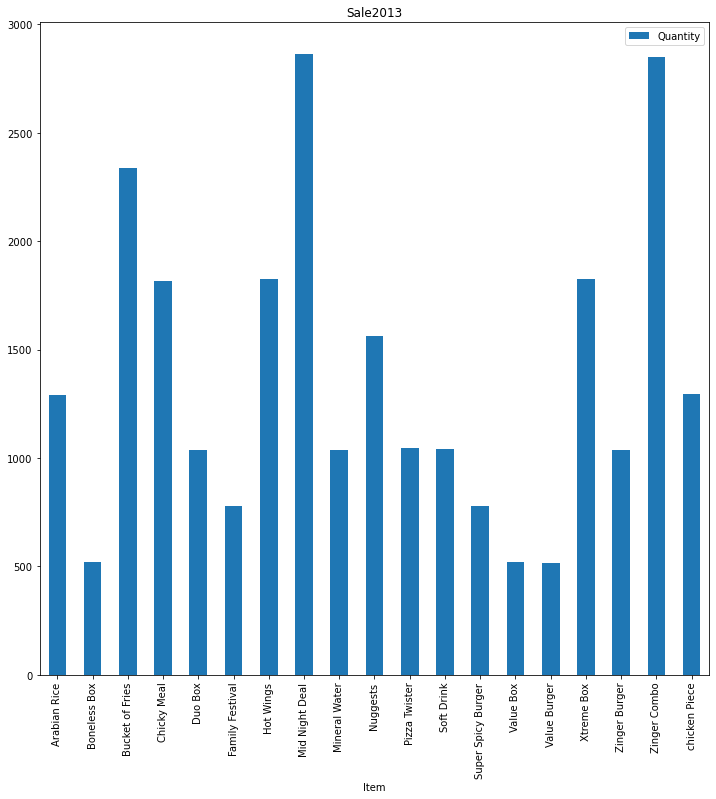

In [147]:
sale_2013=df[df["Year"]==2013].groupby(['Item'])['Quantity'].count()
print(sale_2013)

sale=pd.DataFrame(sale_2013).plot(kind="bar", title="Sale2013", figsize=(12,12))



# Summary

<AxesSubplot:xlabel='Year'>

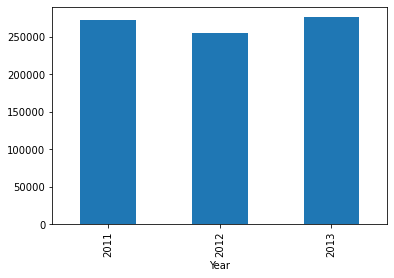

In [151]:
#yearwise sale

df.groupby(['Year'])['Quantity'].sum()
df.groupby(['Year'])['Quantity'].sum().plot(kind="bar")


<AxesSubplot:xlabel='Year'>

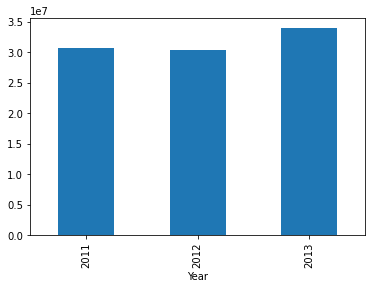

In [152]:
#yearwise profit

df.groupby(['Year'])['Profit'].sum()
df.groupby(['Year'])['Profit'].sum().plot(kind="bar")


In [155]:
total_quantity=df["Quantity"].sum()
print("Total quantity sold in 3 years is ",total_quantity)
total_profit=df["Profit"].sum()
print("Total profit made in 3 years is ",total_profit.round())

Total quantity sold in 3 years is  803923
Total profit made in 3 years is  94916750.0
